In [8]:
# -*- coding: utf-8 -*-
# This is a report using the data from IQAASL.
# IQAASL was a project funded by the Swiss Confederation
# It produces a summary of litter survey results for a defined region.
# These charts serve as the models for the development of plagespropres.ch
# The data is gathered by volunteers.
# Please remember all copyrights apply, please give credit when applicable
# The repo is maintained by the community effective January 01, 2022
# There is ample opportunity to contribute, learn and teach
# contact dev@hammerdirt.ch

# Dies ist ein Bericht, der die Daten von IQAASL verwendet.
# IQAASL war ein von der Schweizerischen Eidgenossenschaft finanziertes Projekt.
# Es erstellt eine Zusammenfassung der Ergebnisse der Littering-Umfrage für eine bestimmte Region.
# Diese Grafiken dienten als Vorlage für die Entwicklung von plagespropres.ch.
# Die Daten werden von Freiwilligen gesammelt.
# Bitte denken Sie daran, dass alle Copyrights gelten, bitte geben Sie den Namen an, wenn zutreffend.
# Das Repo wird ab dem 01. Januar 2022 von der Community gepflegt.
# Es gibt reichlich Gelegenheit, etwas beizutragen, zu lernen und zu lehren.
# Kontakt dev@hammerdirt.ch

# Il s'agit d'un rapport utilisant les données de IQAASL.
# IQAASL était un projet financé par la Confédération suisse.
# Il produit un résumé des résultats de l'enquête sur les déchets sauvages pour une région définie.
# Ces tableaux ont servi de modèles pour le développement de plagespropres.ch
# Les données sont recueillies par des bénévoles.
# N'oubliez pas que tous les droits d'auteur s'appliquent, veuillez indiquer le crédit lorsque cela est possible.
# Le dépôt est maintenu par la communauté à partir du 1er janvier 2022.
# Il y a de nombreuses possibilités de contribuer, d'apprendre et d'enseigner.
# contact dev@hammerdirt.ch

# sys, file and nav packages:
import datetime as dt
from datetime import date, datetime, time
from babel.dates import format_date, format_datetime, format_time, get_month_names
import locale

# math packages:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

# charting:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec
import seaborn as sns
import resources.featuredata as featuredata

# home brew utitilties
import resources.chart_kwargs as ck
import resources.sr_ut as sut

# images and display
from IPython.display import Markdown as md

# set the locale to the language desired
date_lang =  'de_DE.utf8'
language = "de"
locale.setlocale(locale.LC_ALL, date_lang)

# the date is in iso standard:
date_format = "%Y-%m-%d"
# it gets changed to german format
# german_date_format = "%d.%m.%Y"

# set some parameters:
start_date = "2020-03-01"
end_date ="2021-05-31"
start_end = [start_date, end_date]
a_fail_rate = 50
unit_label = "p/100 m"

# charting and colors
sns.set_style("whitegrid")
table_row = "saddlebrown"
# colors for gradients
cmap2 = ck.cmap2
colors_palette = ck.colors_palette
a_color = "saddlebrown"

## !! Begin Note book variables !!

# Changing these variables produces different reports
# Call the map image for the area of interest
bassin_map = "resources/maps/bielersee_scaled.jpeg"

# the label for the aggregation of all data in the region
top = "Alle Erhebungsgebiete"

# define the feature level and components
# the feature of interest is the Aare (aare) at the river basin (river_bassin) level.
# the label for charting is called 'name'
this_feature = {'slug':'bielersee', 'name':"Bielersee", 'level':'water_name_slug'}

# the lake is in this survey area
this_bassin = "aare"
# label for survey area
bassin_label = "Aare-Erhebungsgebiet"

# these are the smallest aggregated components
# choices are water_name_slug=lake or river, city or location at the scale of a river bassin 
# water body or lake maybe the most appropriate
this_level = 'city'

# identify the lakes of interest for the survey area
lakes_of_interest = ["bielersee"]    

# !! End note book variables !!

# Survey location details (GPS, city, land use)
dfBeaches = pd.read_csv("resources/beaches_with_land_use_rates.csv")
# set the index of the beach data to location slug
dfBeaches.set_index("slug", inplace=True)

# Survey dimensions and weights
dfDims = pd.read_csv("resources/corrected_dims.csv")

agg_pcs_quantity = {unit_label: "sum", "quantity": "sum"}

dxCodes = pd.read_csv("resources/codes_with_group_names_2015.csv")
dxCodes.set_index("code", inplace=True)
dxCodes.loc["G708", "material"] = "Metal"
columns={"% to agg":"% agg", "% to recreation": "% recreation", "% to woods":"% woods", "% to buildings":"% buildings", "p/100m":"p/100 m"}
fail_rate = 50

fd_kwargs ={
    "filename": "resources/checked_sdata_eos_2020_21.csv",
    "feature_name": this_feature['name'], 
    "feature_level": this_feature['level'], 
    "these_features": this_feature['slug'], 
    "component": this_level, 
    "columns": columns, 
    "language": 'de', 
    "unit_label": unit_label, 
    "fail_rate": fail_rate,
    "code_data":dxCodes,
    "date_range": start_end    
    
}



fdx = featuredata.Components(**fd_kwargs)
fdx.makeFeatureData()
fdx.adjustForLanguage()
fdx.makeDailyTotalSummary()
fdx.materialSummary()
fdx.mostCommon()
    
# the survey data: for iqaasl un formatted
filename = "resources/checked_sdata_eos_2020_21.csv"
_, a_data = featuredata.featureData(filename, this_feature["level"], date_range=start_end, these_features=this_feature["slug"], columns=columns, language="de")
a_data.rename(columns={'p/100m':unit_label}, inplace=True)
# feature data: the survey data sliced to the date range and feature
fd = fdx.feature_data

# collects the summarized values for the feature data
summary_data = featuredata.AdministrativeSummary(data=fd, dims_data=dfDims, label=this_feature["name"], feature_component=this_level, date_range=start_end, **{"dfBeaches":dfBeaches})

Codes init called
making feature data
back to class
this is german
making material and description map
making daily total summary
generating the sample totals first
sample totals
making the code summary first
making material summary
getting the fail rate
making most common codes table


(bielersee_de)=
# Bielersee

In [9]:
class Caption:
    
    position=''
    figure_number=0
    captions=[]
    start_caption = ""
    end_caption = '*'
    
    def buildCaption(self):
        start_caption = f'*__{self.position}:__'
        new_string=''
        for line in self.captions:
            new_string += line
        end_caption = self.end_caption
        
        return f'{start_caption} {new_string}{end_caption}'
            
map_caption = Caption()
map_caption.position = "Unten"
map_caption.captions = [
    "Karte des Erhebungsgebiets März 2020 bis Mai 2021. ",
    "Der Durchmesser der Punktsymbole entspricht dem Median der",
    "Abfallobjekte pro 100 Meter (p/100 m) am jeweiligen Erhebungsort."
]
md(map_caption.buildCaption())

*__Unten:__ Karte des Erhebungsgebiets März 2020 bis Mai 2021. Der Durchmesser der Punktsymbole entspricht dem Median derAbfallobjekte pro 100 Meter (p/100 m) am jeweiligen Erhebungsort.*

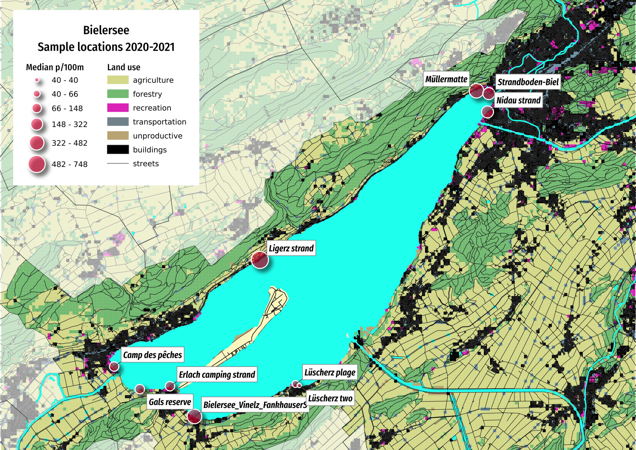

In [10]:
sut.display_image_ipython(bassin_map, thumb=(800,450))

## Erhebungsorte

In [11]:
a_summary = summary_data.summaryObject()

rivers = summary_data.riversOfInterest()
lakes = summary_data.lakesOfInterest()
        
# string objects for display
obj_string = featuredata.thousandsSeparator(a_summary["quantity"], language)
surv_string = "{:,}".format(a_summary["loc_date"])
pop_string = featuredata.thousandsSeparator(int(a_summary["population"]), language)

# make strings
date_quantity_context = F"Im Zeitraum von {featuredata.dateToYearAndMonth(datetime.strptime(start_date, date_format), lang=date_lang)}  bis {featuredata.dateToYearAndMonth(datetime.strptime(end_date, date_format), lang= date_lang)} wurden im Rahmen von {surv_string} Datenerhebungen insgesamt {obj_string } Objekte entfernt und identifiziert."
geo_context = F"Die Ergebnisse des {this_feature['name']} umfassen {a_summary['location']} Orte, {a_summary['city']} Gemeinden und eine Gesamtbevölkerung von etwa {pop_string} Einwohnenden."

# lists of landmarks of interest
munis_joined = ", ".join(sorted(summary_data.populationKeys()["city"]))
lakes_joined = ", ".join(sorted(lakes))
rivers_joined = ", ".join(sorted(rivers))

# put that all together:
lake_string = F"""
{date_quantity_context} {geo_context }

*Gemeinden:*\n\n>{munis_joined}
"""
md(lake_string)


Im Zeitraum von März 2020  bis Mai 2021 wurden im Rahmen von 38 Datenerhebungen insgesamt 4 477 Objekte entfernt und identifiziert. Die Ergebnisse des Bielersee umfassen 10 Orte, 8 Gemeinden und eine Gesamtbevölkerung von etwa 70 810 Einwohnenden.

*Gemeinden:*

>Biel/Bienne, Erlach, Gals, Le Landeron, Ligerz, Lüscherz, Nidau, Vinelz


### Kumulative Gesamtmengen nach Gemeinden

In [12]:
dims_table = summary_data.dimensionalSummary()

# for display
dims_table.sort_values(by=["quantity"], ascending=False, inplace=True)
dims_table.rename(columns={"samples":"Erhebungen","quantity":"Objekte", "total_w":"Gesamtgewicht (kg)", "mac_plast_w":"kg Plastik", "area":"Fläche (m2)", "length":"Länge (m)"}, inplace=True)

# format kilos
dims_table["kg Plastik"] = dims_table["kg Plastik"]/1000
dims_table[["Fläche (m2)", "Länge (m)", "Erhebungen", "Objekte"]] = dims_table[["Fläche (m2)", "Länge (m)", "Erhebungen", "Objekte"]].applymap(lambda x: featuredata.thousandsSeparator(int(x), "de"))
dims_table[["kg Plastik", "Gesamtgewicht (kg)"]] = dims_table[["kg Plastik","Gesamtgewicht (kg)"]].applymap(lambda x: str(round(x,3)).replace(".", ","))

# figure caption
agg_caption = F"""
*__Unten:__ {this_feature["name"]}: kumulierten Gewichte und Masse für die Gemeinden*
"""
md(agg_caption)


*__Unten:__ Bielersee: kumulierten Gewichte und Masse für die Gemeinden*


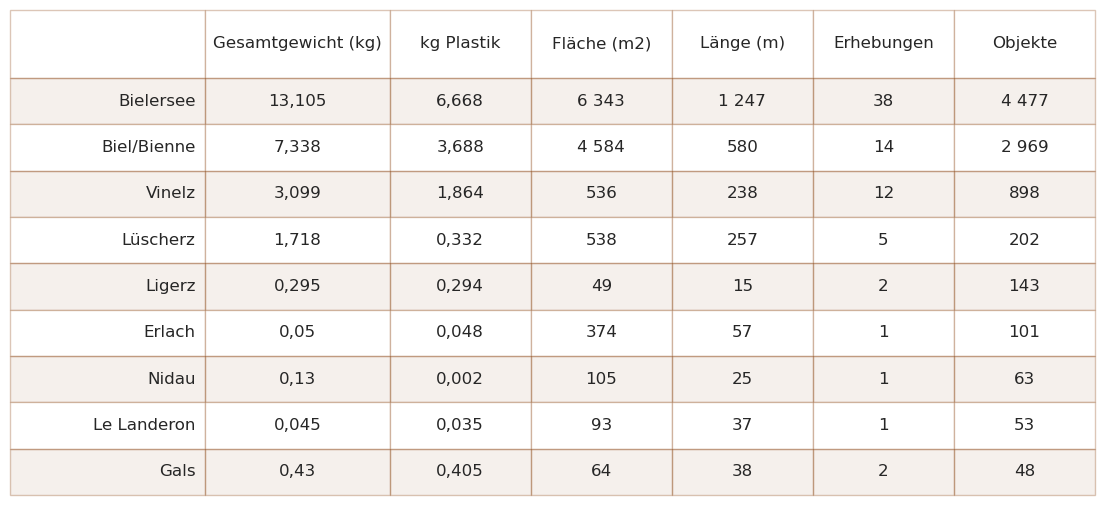

In [13]:
# make table
data = dims_table.reset_index()
colLabels = data.columns

fig, ax = plt.subplots(figsize=(len(colLabels)*2,len(data)*.7))

sut.hide_spines_ticks_grids(ax)
table_one = sut.make_a_table(ax, data.values, colLabels=colLabels, colWidths=[.18, .17, *[.13]*5], a_color=a_color)
table_one.get_celld()[(0,0)].get_text().set_text(" ")
table_one.set_fontsize(12)

plt.show()
plt.tight_layout()
plt.close()

### Verteilung der Erhebungsergebnisse

In [14]:
# fd_dindex = fdx.sample_totals

# Daily totals from all other locations
ots = dict(level_to_exclude=this_feature["level"], components_to_exclude=fd[this_feature["level"]].unique())
dts_date = sut.the_other_surveys(a_data, **ots)
dts_date = dts_date.groupby(["loc_date","date"], as_index=False)[unit_label].sum()
dts_date["date"] = pd.to_datetime(dts_date["date"]).dt.tz_localize('UTC')   

# scale the chart as needed to accomodate for extreme values
y_lim = 95
y_limit = np.percentile(dts_date[unit_label], y_lim)

# label for the chart that alerts to the scale
not_included = F"Werte grösser als {featuredata.thousandsSeparator(int(round(y_limit,0)), language)} {unit_label} werden nicht gezeigt."

chart_notes = f"""
*__Links:__ {this_feature["name"]}, {featuredata.dateToYearAndMonth(datetime.strptime(start_date, date_format), lang=date_lang)} bis {featuredata.dateToYearAndMonth(datetime.strptime(end_date, date_format), lang=date_lang)}, n = {a_summary["loc_date"]}. {not_included} __Rechts:__ empirische Verteilungsfunktion der Erhebungsergebnisse {this_feature["name"]}.*
"""
md(chart_notes )


*__Links:__ Bielersee, März 2020 bis Mai 2021, n = 38. Werte grösser als 1 573 p/100 m werden nicht gezeigt. __Rechts:__ empirische Verteilungsfunktion der Erhebungsergebnisse Bielersee.*


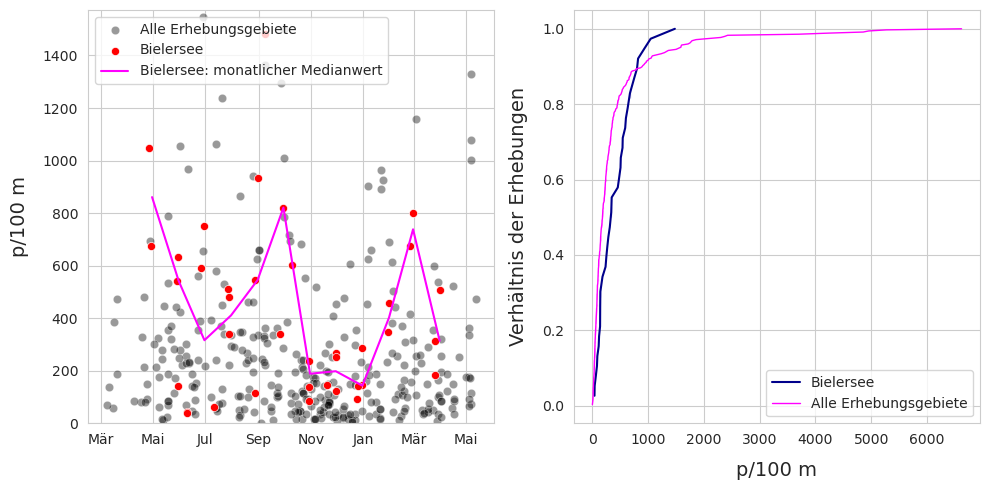

In [15]:
# months locator, can be confusing
# https://matplotlib.org/stable/api/dates_api.html


months = mdates.MonthLocator(interval=1)
months_fmt = mdates.DateFormatter("%b")
days = mdates.DayLocator(interval=7)

# get the monthly or quarterly results for the feature
rsmp = fdx.sample_totals.set_index("date")
resample_plot, rate = sut.quarterly_or_monthly_values(rsmp, this_feature["name"], vals=unit_label, quarterly=["ticino"])


fig, axs = plt.subplots(1,2, figsize=(10,5))

# the survey totals by day
ax = axs[0]

# feature surveys
sns.scatterplot(data=dts_date, x=dts_date["date"], y=unit_label, label=top, color="black", alpha=0.4,  ax=ax)
# all other surveys
sns.scatterplot(data=fdx.sample_totals, x=fdx.sample_totals["date"], y=unit_label, label=this_feature["name"], color="red", s=34, ec="white", ax=ax)
# monthly or quaterly plot
sns.lineplot(data=resample_plot, x=resample_plot.index, y=resample_plot, label=F"{this_feature['name']}: monatlicher Medianwert", color="magenta", ax=ax)

ax.set_ylim(0,y_limit )
ax.set_ylabel(unit_label, **ck.xlab_k14)

ax.set_xlabel("")
ax.xaxis.set_minor_locator(days)
ax.xaxis.set_major_formatter(months_fmt)
ax.legend()

# the cumlative distributions:
axtwo = axs[1]

# the feature of interest
feature_ecd = ECDF(fdx.sample_totals[unit_label].values)    
sns.lineplot(x=feature_ecd.x, y=feature_ecd.y, color="darkblue", ax=axtwo, label=this_feature["name"])

# the other features
other_features = ECDF(dts_date[unit_label].values)
sns.lineplot(x=other_features.x, y=other_features.y, color="magenta", label=top, linewidth=1, ax=axtwo)

axtwo.set_xlabel(unit_label, **ck.xlab_k14)
axtwo.set_ylabel("Verhältnis der Erhebungen", **ck.xlab_k14)

plt.tight_layout()
plt.show()

### Zusammengefasste Daten und Materialarten

In [16]:
# figure caption
summary_of_survey_totals = f"""
*__Links:__ Zusammenfassung der Daten aller Erhebungen am {this_feature["name"]}. __Rechts:__ Gefundene Materialarten am {this_feature["name"]} in Stückzahlen und als prozentuale Anteile (stückzahlbezogen).*
"""
md(summary_of_survey_totals)


*__Links:__ Zusammenfassung der Daten aller Erhebungen am Bielersee. __Rechts:__ Gefundene Materialarten am Bielersee in Stückzahlen und als prozentuale Anteile (stückzahlbezogen).*


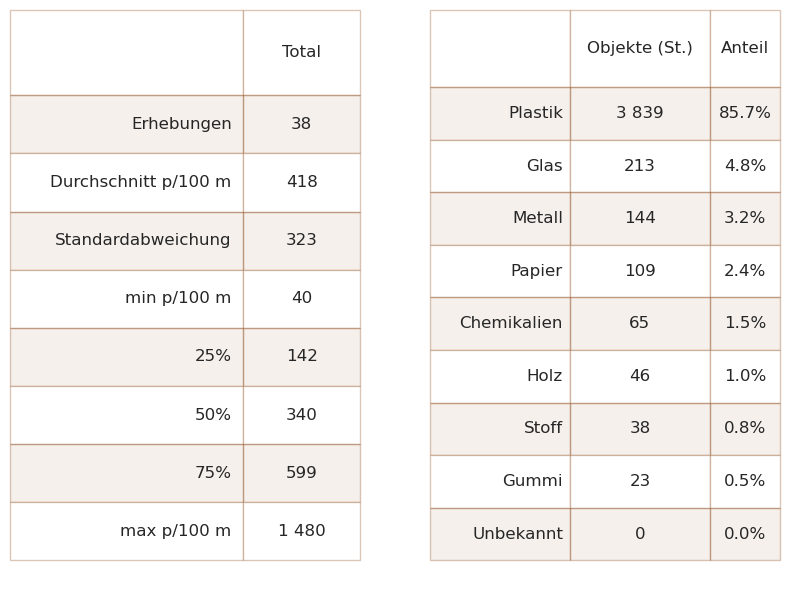

In [17]:
csx = fdx.sample_summary.copy()


combined_summary =[(x, featuredata.thousandsSeparator(int(csx[x]), language)) for x in csx.index]


# the materials table
fd_mat_totals = fdx.material_summary.copy()
fd_mat_totals = sut.fmt_pct_of_total(fd_mat_totals)

# applly new column names for printing
cols_to_use = {"material":"Material","quantity":"Objekte (St.)", "% of total":"Anteil"}
fd_mat_t = fd_mat_totals[cols_to_use.keys()].values
fd_mat_t = [(x[0], featuredata.thousandsSeparator(int(x[1]), language), x[2]) for x in fd_mat_t]

# make tables
fig, axs = plt.subplots(1,2, figsize=(8,6))

# summary table
# names for the table columns
a_col = [this_feature["name"], "Total"]

axone = axs[0]
sut.hide_spines_ticks_grids(axone)

table_two = sut.make_a_table(axone, combined_summary,  colLabels=a_col, colWidths=[.5,.25,.25],  bbox=[0,0,1,1], **{"loc":"lower center"})
table_two.get_celld()[(0,0)].get_text().set_text(" ")
table_two.set_fontsize(12)

# material table
axtwo = axs[1]
axtwo.set_xlabel(" ")
sut.hide_spines_ticks_grids(axtwo)

table_three = sut.make_a_table(axtwo, fd_mat_t,  colLabels=list(cols_to_use.values()), colWidths=[.4, .4,.2],  bbox=[0,0,1,1], **{"loc":"lower center"})
table_three.get_celld()[(0,0)].get_text().set_text(" ")
table_three.set_fontsize(12)
plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.show()

## Die am häufigsten gefundenen Objekte

Die am häufigsten gefundenen Objekte sind die zehn mengenmässig am meisten vorkommenden Objekte und/oder Objekte, die in mindestens 50 % aller Datenerhebungen identifiziert wurden (Häufigkeitsrate)

In [18]:
# get percent of total
m_common_percent_of_total = fdx.most_common["quantity"].sum()/fdx.code_summary["quantity"].sum()
rb_string = f"""
*__Unten__: Häufigste Objekte im {this_feature['name']}: d. h. Objekte mit einer Häufigkeitsrate von mindestens 50 % und/oder Top Ten nach Anzahl. Zusammengenommen machen die häufigsten Objekte {int(m_common_percent_of_total*100)}% aller gefundenen Objekte aus. Anmerkung: p/100 m = Medianwert der Erhebung.*
"""
md(rb_string)


*__Unten__: Häufigste Objekte im Bielersee: d. h. Objekte mit einer Häufigkeitsrate von mindestens 50 % und/oder Top Ten nach Anzahl. Zusammengenommen machen die häufigsten Objekte 73% aller gefundenen Objekte aus. Anmerkung: p/100 m = Medianwert der Erhebung.*


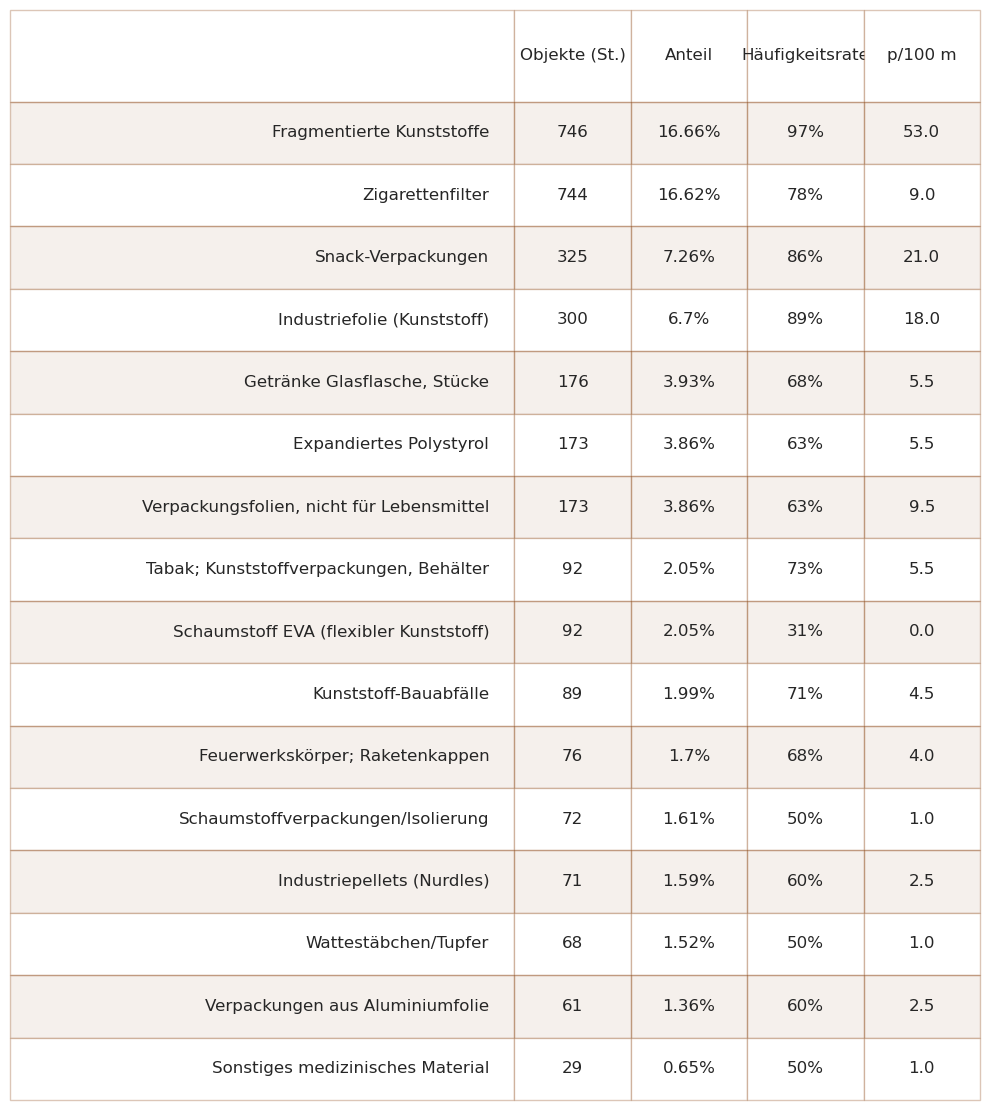

In [19]:
# format values for table
m_common = fdx.most_common.copy()
m_common["item"] = m_common.index.map(lambda x: fdx.dMap.loc[x])
m_common["% of total"] = m_common["% of total"].map(lambda x: F"{x}%")
m_common["quantity"] = m_common.quantity.map(lambda x:featuredata.thousandsSeparator(x, language))
m_common["fail rate"] = m_common["fail rate"].map(lambda x: F"{x}%")
m_common[unit_label] = m_common[unit_label].map(lambda x: F"{round(x,1)}")
cols_to_use = {"item":"Objekt","quantity":"Objekte (St.)", "% of total":"Anteil", "fail rate":"Häufigkeitsrate", unit_label:unit_label}
# cols_to_use = {"item":"Item","quantity":"Quantity", "% of total":"% of total", "fail rate":"Fail rate", unit_label:unit_label}
all_survey_areas = m_common[cols_to_use.keys()].values

fig, axs = plt.subplots(figsize=(10,len(m_common)*.7))

sut.hide_spines_ticks_grids(axs)

table_four = sut.make_a_table(axs, all_survey_areas,  colLabels=list(cols_to_use.values()), colWidths=[.52, .12,.12,.12, .12],  bbox=[0,0,1,1], **{"loc":"lower center"})
table_four.get_celld()[(0,0)].get_text().set_text(" ")
table_four.set_fontsize(12)
plt.tight_layout()
plt.show()

### Die am häufigsten gefundenen Objekte nach Gemeinden

In [20]:
rb_string = F"""
*__Unten:__ Median (p/100 m) der häufigsten Objekte am {this_feature["name"]}.*
"""
md(rb_string)


*__Unten:__ Median (p/100 m) der häufigsten Objekte am Bielersee.*


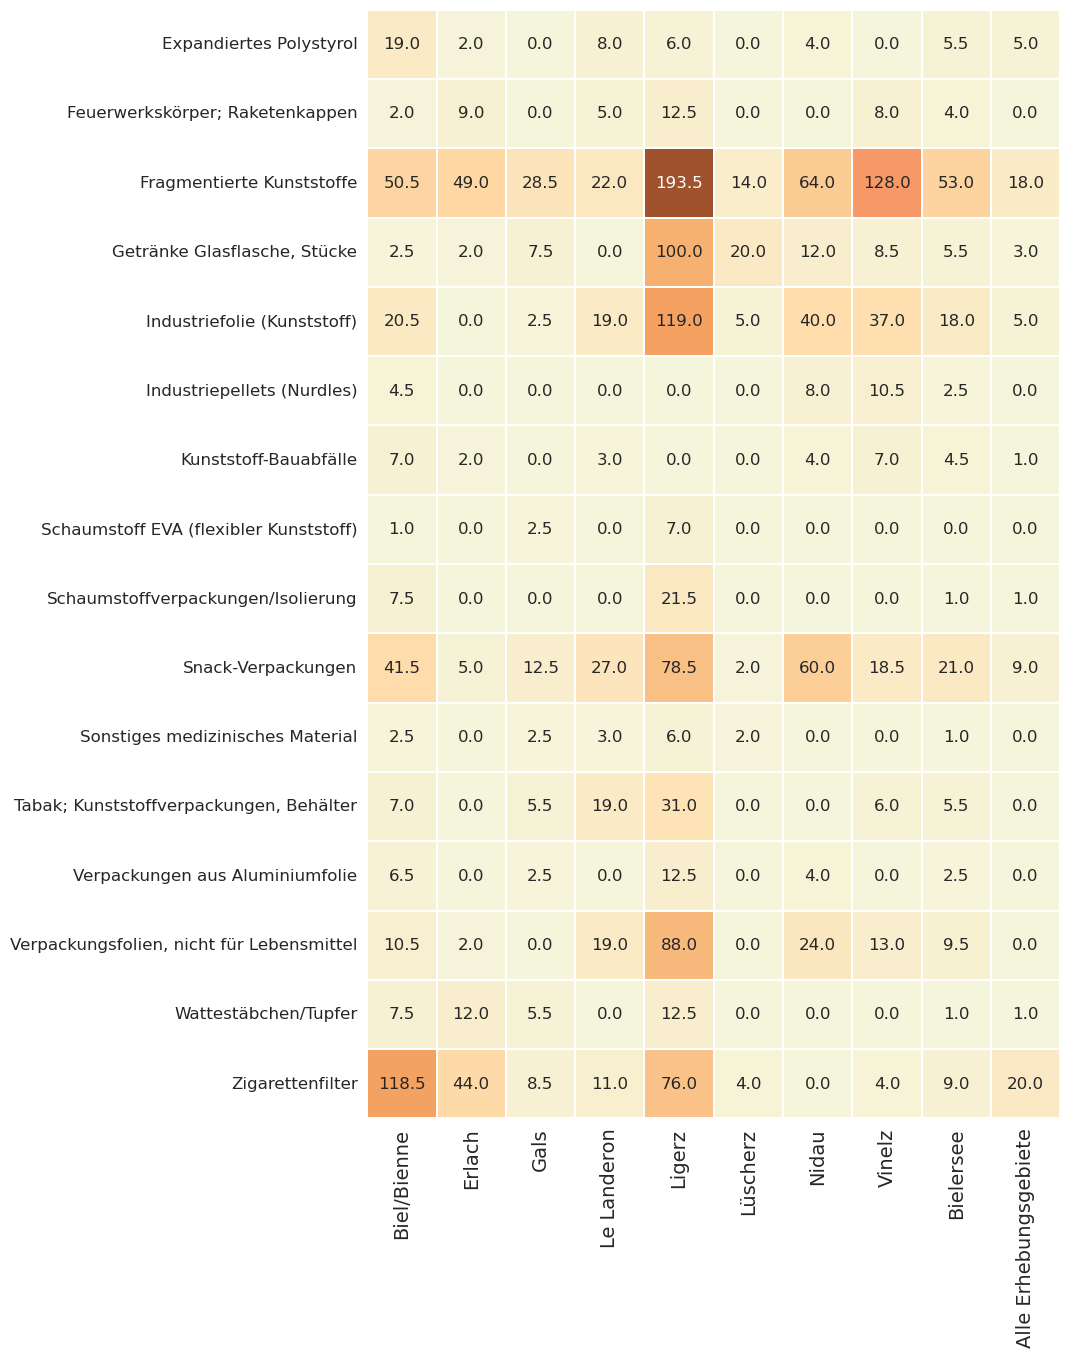

In [21]:
m_common_ft = fdx.componentMostCommonPcsM()

# pivot that
m_c_p = m_common_ft[["item", unit_label, "city"]].pivot(columns="city", index="item")

# quash the hierarchal column index
m_c_p.columns = m_c_p.columns.get_level_values(1)

# the aggregated totals for the survey area
c = sut.aggregate_to_group_name(fd[fd.code.isin(m_common.index)], column="code", name=this_feature["name"], val="med", unit_label=unit_label)

m_c_p[this_feature["name"]]= sut.change_series_index_labels(c, {x:fdx.dMap.loc[x] for x in c.index})

# the aggregated totals of all the data
c = sut.aggregate_to_group_name(a_data[(a_data.code.isin(m_common.index))], column="code", name=top, val="med", unit_label=unit_label)
m_c_p[top] = sut.change_series_index_labels(c, {x:fdx.dMap.loc[x] for x in c.index})

# chart that
fig, ax  = plt.subplots(figsize=(len(m_c_p.columns)*.9,len(m_c_p)*.9))
axone = ax

sns.heatmap(m_c_p, ax=axone, cmap=cmap2, annot=True, annot_kws={"fontsize":12}, fmt=".1f", square=True, cbar=False, linewidth=.1, linecolor="white")
axone.set_xlabel("")
axone.set_ylabel("")
axone.tick_params(labelsize=14, which="both", axis="x")
axone.tick_params(labelsize=12, which="both", axis="y")

plt.setp(axone.get_xticklabels(), rotation=90)

plt.show()
plt.close()

### Die am häufigsten gefundenen Objekte im monatlichen Durchschnitt

In [22]:
# collect the survey results of the most common objects
m_common_m = fd[(fd.code.isin(m_common.index))].groupby(["loc_date","date","code", "groupname"], as_index=False).agg(agg_pcs_quantity)
m_common_m.set_index("date", inplace=True)

# set the order of the chart, group the codes by groupname columns
an_order = m_common_m.groupby(["code","groupname"], as_index=False).quantity.sum().sort_values(by="groupname")["code"].values

# a manager dict for the monthly results of each code
mgr = {}

# get the monhtly results for each code:
for a_group in an_order:
    # resample by month
    a_plot = m_common_m[(m_common_m.code==a_group)][unit_label].resample("M").mean().fillna(0)
    this_group = {a_group:a_plot}
    mgr.update(this_group)

monthly_mc = F"""
*__Below:__ {this_feature["name"]}, monatliche Durchschnittsergebnisse p/100 m.*
"""
md(monthly_mc)


*__Below:__ Bielersee, monatliche Durchschnittsergebnisse p/100 m.*


In [ ]:
months={
    0:"Jan",
    1:"Feb",
    2:"Mar",
    3:"Apr",
    4:"May",
    5:"Jun",
    6:"Jul",
    7:"Aug",
    8:"Sep",
    9:"Oct",
    10:"Nov",
    11:"Dec"
}

# convenience function to lable x axis
def new_month(x):
    if x <= 11:
        this_month = x
    else:
        this_month=x-12    
    return this_month

fig, ax = plt.subplots(figsize=(10,7))

# define a bottom
bottom = [0]*len(mgr["G27"])

# the monhtly survey average for all objects and locations
monthly_fd = fd.groupby(["loc_date", "date"], as_index=False).agg(agg_pcs_quantity)
monthly_fd.set_index("date", inplace=True)
m_fd = monthly_fd[unit_label].resample("M").mean().fillna(0)

# define the xaxis
this_x = [i for i,x in  enumerate(m_fd.index)]

# plot the monthly total survey average
ax.bar(this_x, m_fd.to_numpy(), color=table_row, alpha=0.2, linewidth=1, edgecolor="teal", width=1, label="Monthly survey average") 

# plot the monthly survey average of the most common objects
for i, a_group in enumerate(an_order): 
    
    # define the axis
    this_x = [i for i,x in  enumerate(mgr[a_group].index)]
    
    # collect the month
    this_month = [x.month for i,x in enumerate(mgr[a_group].index)]
    
    # if i == 0 laydown the first bars
    if i == 0:
        ax.bar(this_x, mgr[a_group].to_numpy(), label=a_group, color=colors_palette[a_group], linewidth=1, alpha=0.6 ) 
    # else use the previous results to define the bottom
    else:
        bottom += mgr[an_order[i-1]].to_numpy()        
        ax.bar(this_x, mgr[a_group].to_numpy(), bottom=bottom, label=a_group, color=colors_palette[a_group], linewidth=1, alpha=0.8)
        
# collect the handles and labels from the legend
handles, labels = ax.get_legend_handles_labels()

# set the location of the x ticks
ax.xaxis.set_major_locator(ticker.FixedLocator([i for i in np.arange(len(this_x))]))
ax.set_ylabel(unit_label, **ck.xlab_k14)

# label the xticks by month
#label the xticks by month
axisticks = ax.get_xticks()
labelsx = [sut.months_de[new_month(x-1)] for x in  this_month]
plt.xticks(ticks=axisticks, labels=labelsx)

# make the legend
# swap out codes for descriptions
new_labels = [fdx.dMap.loc[x] for x in labels[1:]]
new_labels = new_labels[::-1]

# insert a label for the monthly average
new_labels.insert(0,"Monthly survey average")
handles = [handles[0], *handles[1:][::-1]]
    
plt.legend(handles=handles, labels=new_labels, bbox_to_anchor=(.5, -.05), loc="upper center",  ncol=1, fontsize=14)       
plt.show()

## Verwendungszweck der gefundenen Objekte

Der Verwendungszweck basiert auf der Verwendung des Objekts, bevor es weggeworfen wurde, oder auf der Artikelbeschreibung, wenn die ursprüngliche Verwendung unbestimmt ist. Identifizierte Objekte werden einer der 260 vordefinierten Kategorien zugeordnet. Die Kategorien werden je nach Verwendung oder Artikelbeschreibung gruppiert.

* Abwasser: Objekte, die aus Kläranlagen freigesetzt werden, sprich Objekte, die wahrscheinlich über die Toilette entsorgt werden
* Mikroplastik (< 5 mm): fragmentierte Kunststoffe und Kunststoffharze aus der Vorproduktion
* Infrastruktur: Artikel im Zusammenhang mit dem Bau und der Instandhaltung von Gebäuden, Strassen und der Wasser-/Stromversorgung
* Essen und Trinken: alle Materialien, die mit dem Konsum von Essen und Trinken in Zusammenhang stehen
* Landwirtschaft: Materialien z. B. für Mulch und Reihenabdeckungen, Gewächshäuser, Bodenbegasung, Ballenverpackungen. Einschliesslich Hartkunststoffe für landwirtschaftliche Zäune, Blumentöpfe usw.
* Tabakwaren: hauptsächlich Zigarettenfilter, einschliesslich aller mit dem Rauchen verbundenen Materialien
* Freizeit und Erholung: Objekte, die mit Sport und Freizeit zu tun haben, z. B. Angeln, Jagen, Wandern usw.
* Verpackungen ausser Lebensmittel und Tabak: Verpackungsmaterial, das nicht lebensmittel- oder tabakbezogen ist
* Plastikfragmente: Plastikteile unbestimmter Herkunft oder Verwendung
* Persönliche Gegenstände: Accessoires, Hygieneartikel und Kleidung

Im Anhang (Kapitel 3.6.3) befindet sich die vollständige Liste der identifizierten Objekte, einschliesslich Beschreibungen und Gruppenklassifizierung. Das Kapitel [16 Codegruppen](codegroups) beschreibt jede Codegruppe im Detail und bietet eine umfassende Liste aller Objekte in einer Gruppe.

In [ ]:
cg_poft = F"""
__Unten:__ Verwendungszweck oder Beschreibung der identifizierten Objekte in % der Gesamtzahl nach Gemeinden im Erhebungsgebiet {this_feature["name"]}. Fragmentierte Objekte, die nicht eindeutig identifiziert werden können, werden weiterhin nach ihrer Grösse klassifiziert.
"""
md(cg_poft)

In [ ]:
# get the percent of total for each group for each survey area
cg_t = fdx.componentCodeGroupResults()

# pivot that
data_table = cg_t.pivot(columns=this_level, index="groupname", values="pt")

# repeat for the survey area
data_table[this_feature['name'] ] = sut.aggregate_to_group_name(fd, unit_label=unit_label, column="groupname", name=this_feature['name'] , val="pt")

# repeat for all the data
data_table[top] = sut.aggregate_to_group_name(a_data, unit_label=unit_label, column="groupname", name=top, val="pt")

data = data_table

fig, ax = plt.subplots(figsize=(10,10))

axone = ax
sns.heatmap(data , ax=axone, cmap=cmap2, annot=True, annot_kws={"fontsize":12}, cbar=False, fmt=".0%", linewidth=.1, square=True, linecolor="white")

axone.set_ylabel("")
axone.set_xlabel("")
axone.tick_params(labelsize=14, which="both", axis="both", labeltop=False, labelbottom=True)

plt.setp(axone.get_xticklabels(), rotation=90, fontsize=14)
plt.setp(axone.get_yticklabels(), rotation=0, fontsize=14)

plt.show()

In [ ]:
cg_medpcm = F"""
<br></br>
*__Unten:__ Verwendungszweck der gefundenen Objekte Median p/100 m am {this_feature["name"]}. Fragmentierte Objekte, die nicht eindeutig identifiziert werden können, werden weiterhin nach ihrer Grösse klassifiziert.*
"""
md(cg_medpcm)

In [ ]:
# median p/50m of all the water features
data_table = cg_t.pivot(columns="city", index="groupname", values=unit_label)

# the survey area columns
data_table[this_feature['name'] ] = sut.aggregate_to_group_name(fd, unit_label=unit_label, column="groupname", name=this_feature['name'] , val="med")

# column for all the surveys
data_table[top] = sut.aggregate_to_group_name(a_data, unit_label=unit_label, column="groupname", name=top, val="med")

# merge with data_table
data = data_table
# data.rename(columns={x:wname_wname.loc[x][0] for x in data.columns[:-2]}, inplace=True)
fig, ax = plt.subplots(figsize=(10,10))

axone = ax
sns.heatmap(data , ax=axone, cmap=cmap2, annot=True, annot_kws={"fontsize":12}, fmt="g", cbar=False, linewidth=.1, square=True, linecolor="white")

axone.set_xlabel("")
axone.set_ylabel("")
axone.tick_params(labelsize=14, which="both", axis="both", labeltop=False, labelbottom=True)

plt.setp(axone.get_xticklabels(), rotation=90, fontsize=14)
plt.setp(axone.get_yticklabels(), rotation=0, fontsize=14)

plt.show()

## Anhang

### Schaumstoffe und Kunststoffe nach Grösse

Die folgende Tabelle enthält die Komponenten «Gfoam» und «Gfrag», die für die Analyse gruppiert wurden. Objekte, die als Schaumstoffe gekennzeichnet sind, werden als Gfoam gruppiert und umfassen alle geschäumten Polystyrol-Kunststoffe > 0,5 cm. Kunststoffteile und Objekte aus kombinierten Kunststoff- und Schaumstoffmaterialien > 0,5 cm werden für die Analyse als Gfrags gruppiert.

In [ ]:
frag_foams = F"""
*__Below:__ Fragmentierte und geschäumte Kunststoffe nach Grösse am {this_feature["name"]},  Median p/100 m, Anzahl der gefundenen Objekte und Prozent der Gesamtmenge.*
"""
md(frag_foams)

In [ ]:
# collect the data before aggregating foams for all locations in the survye area
# group by loc_date and code
# Combine the different sizes of fragmented plastics and styrofoam
# the codes for the foams

agg_pcs_median = {unit_label:"median", "quantity":"sum"}
before_agg = pd.read_csv("resources/checked_before_agg_sdata_eos_2020_21.csv")
some_foams = ["G81", "G82", "G83", "G74"]
before_agg.rename(columns={"p/100m":unit_label}, inplace=True)

# the codes for the fragmented plastics
some_frag_plas = list(before_agg[before_agg.groupname == "plastic pieces"].code.unique())

fd_frags_foams = before_agg[(before_agg.code.isin([*some_frag_plas, *some_foams]))&(before_agg.location.isin(a_summary["locations_of_interest"]))].groupby(["loc_date","code"], as_index=False).agg(agg_pcs_quantity)
fd_frags_foams = fd_frags_foams.groupby("code").agg(agg_pcs_median)

# add code description and format for printing
fd_frags_foams["item"] = fd_frags_foams.index.map(lambda x: fdx.dMap.loc[x])
fd_frags_foams["% of total"] = (fd_frags_foams.quantity/fd.quantity.sum()*100).round(2)
fd_frags_foams["% of total"] = fd_frags_foams["% of total"].map(lambda x: F"{x}%")
fd_frags_foams["quantity"] = fd_frags_foams["quantity"].map(lambda x: F"{x:,}")

# table data
data = fd_frags_foams[["item",unit_label, "quantity", "% of total"]]
data.rename(columns={"quantity":"Objekte (St.)", "% of total":"Anteil"}, inplace=True)

fig, axs = plt.subplots(figsize=(len(data.columns)*2.6,len(data)*.7))

sut.hide_spines_ticks_grids(axs)

table_seven = sut.make_a_table(axs,data.values,  colLabels=data.columns, colWidths=[.6, .13, .15, .11], a_color=table_row)
table_seven.get_celld()[(0,0)].get_text().set_text(" ")
table_seven.set_fontsize(12)

plt.show()
plt.tight_layout()
plt.close()

### Die Erhebungsorte

In [ ]:
# display the survey locations
disp_columns = ["latitude", "longitude", "city"]
disp_beaches = summary_data.df_beaches.loc[a_summary["locations_of_interest"]][disp_columns]
disp_beaches.reset_index(inplace=True)
disp_beaches.rename(columns={"city":"stat", "slug":"standort"}, inplace=True)
disp_beaches.set_index("standort", inplace=True, drop=True)

disp_beaches

### Inventar der Objekte

In [ ]:
pd.set_option("display.max_rows", None)
complete_inventory = fdx.code_summary
complete_inventory.rename(columns={"item":"Objekte", "groupname":"Gruppenname", "quantity":"Gesamt", "% of total":"% Gesamt", "fail rate":"fail rate" }, inplace=True)


complete_inventory.sort_values(by="Gesamt", ascending=False)